# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [15]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual
# Classification Code
cc = 'AG4' # AG2, AG4, AG6

# Initialisation

In [8]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, 201912, 'HS', 'M')
print(status)
status = tta.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


# Data

In [4]:
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df = tta.prepare(data)

{'r': 699, 'p': 418, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': 418, 'p': 699, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [5]:
df.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
0202,0202,Meat of bovine animals; frozen,259000,Weight in kilograms,0.76,1582000,Weight in kilograms,3.36,-2.60,-1323000,-5.108108e+02,-3.421053e+02,2.60,3.421053e+02
0206,0206,"Edible offal of bovine animals, swine, sheep, ...",290000,Weight in kilograms,0.66,25000,Weight in kilograms,0.10,0.56,265000,9.137931e+01,8.484848e+01,0.56,8.484848e+01
1102,1102,Cereal flours; other than of wheat or meslin,0,Weight in kilograms,0.00,5000,Weight in kilograms,0.00,0.00,-5000,-inf,NaN,0.00,NaN
1105,1105,"Flour, meal, powder, flakes, granules and pell...",0,Weight in kilograms,0.00,621000,Weight in kilograms,0.59,-0.59,-621000,-inf,-inf,0.59,inf
1209,1209,"Seeds, fruit and spores; of a kind used for so...",0,Weight in kilograms,0.00,4,Weight in kilograms,0.00,0.00,-4,-inf,NaN,0.00,NaN
1211,1211,Plants and parts of plants (including seeds an...,4,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,4,1.000000e+02,NaN,0.00,NaN
2008,2008,"Fruit, nuts and other edible parts of plants; ...",35444,Weight in kilograms,0.10,0,Weight in kilograms,0.00,0.10,35444,1.000000e+02,1.000000e+02,0.10,1.000000e+02
2106,2106,Food preparations not elsewhere specified or i...,600,Weight in kilograms,0.01,31590,Weight in kilograms,0.09,-0.08,-30990,-5.165000e+03,-8.000000e+02,0.08,8.000000e+02
2301,2301,"Flours, meal and pellets, of meat or meat offa...",60000,Weight in kilograms,0.07,121618,Weight in kilograms,0.15,-0.08,-61618,-1.026967e+02,-1.142857e+02,0.08,1.142857e+02
2302,2302,"Bran, sharps and other residues; whether or no...",0,Weight in kilograms,0.00,3666763,Weight in kilograms,0.81,-0.81,-3666763,-inf,-inf,0.81,inf


# Plot

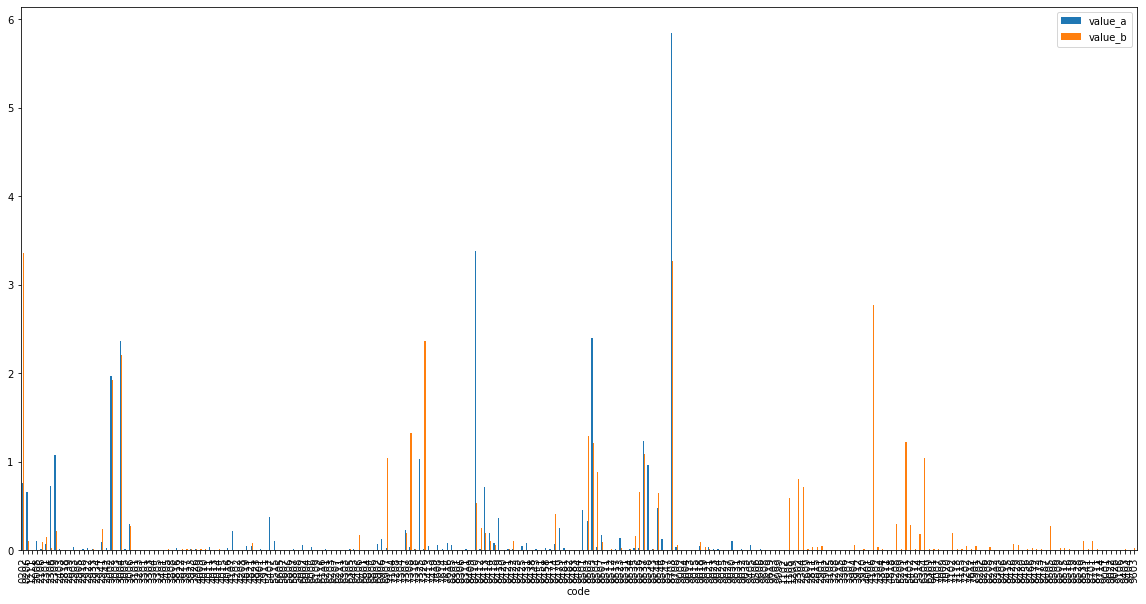

In [9]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Export

In [11]:
df.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregate

In [12]:
print("Total Export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per partner data:", df['value_b'].sum(), " million USD.")

Total Export, as per reporter data: 29.18  million USD.
Total Import, as per partner data: 34.6  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [29]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
8410,8410,Turbines; hydraulic water wheels and regulator...,306829,No Quantity,3.38,149176,Weight in kilograms,0.53,2.85,157653,5.138139e+01,8.431953e+01,2.85,8.431953e+01
4106,4106,Tanned or crust hides and skins of other anima...,0,Weight in kilograms,0.00,276073,Weight in kilograms,2.77,-2.77,-276073,-inf,-inf,2.77,inf
0202,0202,Meat of bovine animals; frozen,259000,Weight in kilograms,0.76,1582000,Weight in kilograms,3.36,-2.60,-1323000,-5.108108e+02,-3.421053e+02,2.60,3.421053e+02
8703,8703,Motor cars and other motor vehicles; principal...,547686,Number of items,5.85,396763,Number of items,3.27,2.58,150923,2.755648e+01,4.410256e+01,2.58,4.410256e+01
7326,7326,"Iron or steel; articles, n.e.c. in chapter 73",4089,Weight in kilograms,0.01,1250000,Weight in kilograms,2.36,-2.35,-1245911,-3.046982e+04,-2.350000e+04,2.35,2.350000e+04
7308,7308,Structures of iron or steel and parts thereof;...,24061,Weight in kilograms,0.04,85949,Weight in kilograms,1.33,-1.29,-61888,-2.572129e+02,-3.225000e+03,1.29,3.225000e+03
5211,5211,"Woven fabrics of cotton, containing less than ...",0,Weight in kilograms,0.00,149736,Weight in kilograms,1.22,-1.22,-149736,-inf,-inf,1.22,inf
8503,8503,Electric motors and generators; parts suitable...,0,Weight in kilograms,2.40,112934,Weight in kilograms,1.21,1.19,-112934,-inf,4.958333e+01,1.19,4.958333e+01
6304,6304,Furnishing articles; excluding those of headin...,0,Weight in kilograms,0.00,306700,Weight in kilograms,1.04,-1.04,-306700,-inf,-inf,1.04,inf
7325,7325,Iron or steel; cast articles,827829,Weight in kilograms,1.03,0,Weight in kilograms,0.00,1.03,827829,1.000000e+02,1.000000e+02,1.03,1.000000e+02


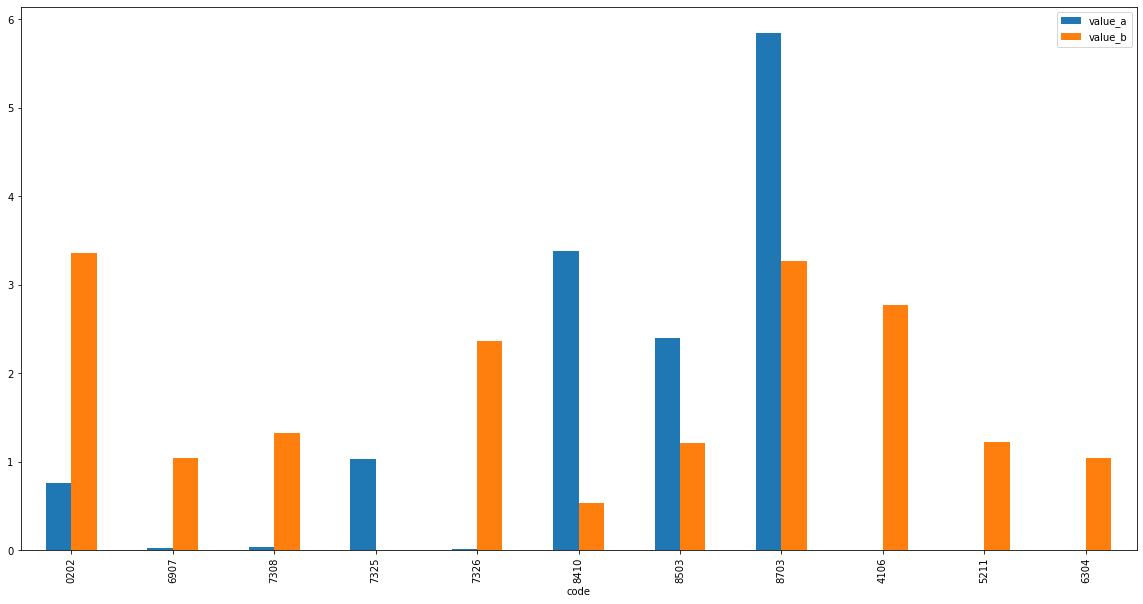

In [30]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()